In [1]:
from ContinualEvolvingSNN import *
import arff
import warnings
from scipy.io import loadmat
warnings.filterwarnings("ignore")
%matplotlib inline
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
device = torch.device('cuda:2' if torch.cuda.is_available() else 'cpu')

## Load Data and Convert to Spikes

In [2]:
trainpath = '../datasets/EukaryotePseAAC/EukaryotePseAAC7766_train_MVMD.mat'
testpath = '../datasets/EukaryotePseAAC/EukaryotePseAAC7766_test_MVMD.mat'

train_ = loadmat(trainpath)
train_data, train_labels = train_['transformed_train_data'], np.array(train_['labels'])

test_ = loadmat(testpath)
test_data, test_labels = test_['transformed_test_data'], np.array(test_['labels'])

a = train_data.max(axis=0)
b = train_data.min(axis=0)

delete_indices = [0, 12, 15]
train_labels = np.delete(train_labels, delete_indices, 1)
test_labels = np.delete(test_labels, delete_indices, 1)

train_spikes = encoding(train_data, device, a, b)
test_spikes = encoding(test_data, device, a, b)
print("Train data shape: ", np.array(train_spikes).shape)
print("Train labels shape: ", np.array(train_labels).shape)
print("Test data shape: ", np.array(test_spikes).shape)
print("Test labels shape: ", np.array(test_labels).shape)

100%|██████████| 3108/3108 [00:00<00:00, 7516.85it/s]

Train data shape:  (4658, 1, 120)
Train labels shape:  (4658, 19)
Test data shape:  (3108, 1, 120)
Test labels shape:  (3108, 19)


## CIFDM Training and Evaluation Mode

Training and Evaluating on task 1
Train data shape is  (435, 1, 120)
Train Labels shape is  (435, 2)
Classes trained are: 0 to 2


  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 1, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 1


100%|██████████| 2500/2500 [30:53<00:00,  1.35it/s]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(3108, 2) (3108, 2)
|                     |          0 |
|:--------------------|-----------:|
| hamming loss        | 0.458494   |
| zero_one_loss       | 0.910875   |
| one_error           | 0.00611326 |
| micro av. jaccard   | 0.0888747  |
| macro av. jaccard   | 0.0447233  |
| micro av. precision | 0.0894466  |
| macro av. precision | 0.0447233  |
| micro av. recall    | 0.932886   |
| macro av. recall    | 0.5        |
| micro av. f1        | 0.163241   |
| macro av. f1        | 0.0821028  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(3108, 2) (3108, 2)
|                     |          0 |
|:--------------------|-----------:|
| hamming loss        | 0.458494   |
| zero_one_loss       | 0.910875   |
| one_error           | 0.00611326 |
| micro av. jaccard   | 0.0888747  |
| macro av. jaccard   | 0.0447233  |
| micro av. precision | 0.0894

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 2
Class 2, class 1 neurons = 1, class 0 neurons = 2
Class 3, class 1 neurons = 1, class 0 neurons = 2


100%|██████████| 2500/2500 [1:19:10<00:00,  1.90s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(3108, 2) (3108, 2)
|                     |           0 |
|:--------------------|------------:|
| hamming loss        | 0.124678    |
| zero_one_loss       | 0.248391    |
| one_error           | 0.000965251 |
| micro av. jaccard   | 0.126268    |
| macro av. jaccard   | 0.100945    |
| micro av. precision | 0.138786    |
| macro av. precision | 0.12004     |
| micro av. recall    | 0.583333    |
| macro av. recall    | 0.433014    |
| micro av. f1        | 0.224224    |
| macro av. f1        | 0.181747    |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(3108, 4) (3108, 4)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.291586  |
| zero_one_loss       | 0.932432  |
| one_error           | 0         |
| micro av. jaccard   | 0.0971357 |
| macro av. jaccard   | 0.0728341 |
| micro av. precision | 

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 2
Class 2, class 1 neurons = 2, class 0 neurons = 4
Class 3, class 1 neurons = 2, class 0 neurons = 4
Class 4, class 1 neurons = 1, class 0 neurons = 2
Class 5, class 1 neurons = 2, class 0 neurons = 1


100%|██████████| 2500/2500 [1:43:33<00:00,  2.49s/it]


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(3108, 2) (3108, 2)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.364543 |
| zero_one_loss       | 0.71879  |
| one_error           | 0.010296 |
| micro av. jaccard   | 0.278344 |
| macro av. jaccard   | 0.140605 |
| micro av. precision | 0.28121  |
| macro av. precision | 0.140605 |
| micro av. recall    | 0.96468  |
| macro av. recall    | 0.5      |
| micro av. f1        | 0.435476 |
| macro av. f1        | 0.219488 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(3108, 6) (3108, 6)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.312956  |
| zero_one_loss       | 0.995495  |
| one_error           | 0         |
| micro av. jaccard   | 0.17559   |
| macro av. jaccard   | 0.0813966 |
| micro av. precision | 0.179469  |
| macro av. precision | 0.0

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 2
Class 2, class 1 neurons = 2, class 0 neurons = 4
Class 3, class 1 neurons = 3, class 0 neurons = 5
Class 4, class 1 neurons = 1, class 0 neurons = 2
Class 5, class 1 neurons = 2, class 0 neurons = 1
Class 6, class 1 neurons = 1, class 0 neurons = 1
Class 7, class 1 neurons = 1, class 0 neurons = 1


100%|██████████| 2500/2500 [2:16:36<00:00,  3.28s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(3108, 2) (3108, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.037323  |
| zero_one_loss       | 0.0746461 |
| one_error           | 0         |
| micro av. jaccard   | 0         |
| macro av. jaccard   | 0         |
| micro av. precision | 0         |
| macro av. precision | 0         |
| micro av. recall    | 0         |
| macro av. recall    | 0         |
| micro av. f1        | 0         |
| macro av. f1        | 0         |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(3108, 8) (3108, 8)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.246099  |
| zero_one_loss       | 0.995495  |
| one_error           | 0         |
| micro av. jaccard   | 0.169855  |
| macro av. jaccard   | 0.061338  |
| micro av. precision | 0.178985  |
| macro av. pr

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 2, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 2
Class 2, class 1 neurons = 2, class 0 neurons = 4
Class 3, class 1 neurons = 4, class 0 neurons = 6
Class 4, class 1 neurons = 1, class 0 neurons = 2
Class 5, class 1 neurons = 2, class 0 neurons = 1
Class 6, class 1 neurons = 1, class 0 neurons = 1
Class 7, class 1 neurons = 1, class 0 neurons = 1
Class 8, class 1 neurons = 1, class 0 neurons = 1
Class 9, class 1 neurons = 1, class 0 neurons = 1


100%|██████████| 2500/2500 [2:47:01<00:00,  4.01s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(3108, 2) (3108, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0701416 |
| zero_one_loss       | 0.140283  |
| one_error           | 0         |
| micro av. jaccard   | 0         |
| macro av. jaccard   | 0         |
| micro av. precision | 0         |
| macro av. precision | 0         |
| micro av. recall    | 0         |
| macro av. recall    | 0         |
| micro av. f1        | 0         |
| macro av. f1        | 0         |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(3108, 10) (3108, 10)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.209942  |
| zero_one_loss       | 0.995817  |
| one_error           | 0         |
| micro av. jaccard   | 0.160124  |
| macro av. jaccard   | 0.048638  |
| micro av. precision | 0.179019  |
| macro av. 

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 4
Class 2, class 1 neurons = 2, class 0 neurons = 6
Class 3, class 1 neurons = 5, class 0 neurons = 9
Class 4, class 1 neurons = 1, class 0 neurons = 4
Class 5, class 1 neurons = 4, class 0 neurons = 1
Class 6, class 1 neurons = 1, class 0 neurons = 3
Class 7, class 1 neurons = 1, class 0 neurons = 3
Class 8, class 1 neurons = 1, class 0 neurons = 3
Class 9, class 1 neurons = 1, class 0 neurons = 3
Class 10, class 1 neurons = 1, class 0 neurons = 3
Class 11, class 1 neurons = 1, class 0 neurons = 3


100%|██████████| 2500/2500 [3:57:42<00:00,  5.70s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(3108, 2) (3108, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0210746 |
| zero_one_loss       | 0.0421493 |
| one_error           | 0         |
| micro av. jaccard   | 0         |
| macro av. jaccard   | 0         |
| micro av. precision | 0         |
| macro av. precision | 0         |
| micro av. recall    | 0         |
| macro av. recall    | 0         |
| micro av. f1        | 0         |
| macro av. f1        | 0         |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(3108, 12) (3108, 12)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.177043  |
| zero_one_loss       | 0.996139  |
| one_error           | 0         |
| micro av. jaccard   | 0.158103  |
| macro av. jaccard   | 0.0408248 |
| micro av. precision | 0.180023  |
| macro av. 

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 4
Class 2, class 1 neurons = 2, class 0 neurons = 6
Class 3, class 1 neurons = 5, class 0 neurons = 13
Class 4, class 1 neurons = 1, class 0 neurons = 4
Class 5, class 1 neurons = 4, class 0 neurons = 1
Class 6, class 1 neurons = 1, class 0 neurons = 3
Class 7, class 1 neurons = 1, class 0 neurons = 3
Class 8, class 1 neurons = 1, class 0 neurons = 3
Class 9, class 1 neurons = 1, class 0 neurons = 3
Class 10, class 1 neurons = 1, class 0 neurons = 3
Class 11, class 1 neurons = 1, class 0 neurons = 3
Class 12, class 1 neurons = 1, class 0 neurons = 5
Class 13, class 1 neurons = 1, class 0 neurons = 4


100%|██████████| 2500/2500 [4:43:57<00:00,  6.81s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(3108, 2) (3108, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.0678893 |
| zero_one_loss       | 0.135779  |
| one_error           | 0         |
| micro av. jaccard   | 0.126294  |
| macro av. jaccard   | 0.065032  |
| micro av. precision | 0.209622  |
| macro av. precision | 0.104811  |
| micro av. recall    | 0.241107  |
| macro av. recall    | 0.127615  |
| micro av. f1        | 0.224265  |
| macro av. f1        | 0.115094  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(3108, 14) (3108, 14)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.163081  |
| zero_one_loss       | 0.996139  |
| one_error           | 0         |
| micro av. jaccard   | 0.154735  |
| macro av. jaccard   | 0.0433777 |
| micro av. precision | 0.179271  |
| macro av. 

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 4
Class 2, class 1 neurons = 2, class 0 neurons = 6
Class 3, class 1 neurons = 5, class 0 neurons = 16
Class 4, class 1 neurons = 1, class 0 neurons = 4
Class 5, class 1 neurons = 4, class 0 neurons = 1
Class 6, class 1 neurons = 1, class 0 neurons = 3
Class 7, class 1 neurons = 1, class 0 neurons = 3
Class 8, class 1 neurons = 1, class 0 neurons = 3
Class 9, class 1 neurons = 1, class 0 neurons = 3
Class 10, class 1 neurons = 1, class 0 neurons = 3
Class 11, class 1 neurons = 1, class 0 neurons = 3
Class 12, class 1 neurons = 1, class 0 neurons = 5
Class 13, class 1 neurons = 2, class 0 neurons = 5
Class 14, class 1 neurons = 1, class 0 neurons = 1
Class 15, class 1 neurons = 1, class 0 neurons = 2


100%|██████████| 2500/2500 [5:20:06<00:00,  7.68s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(3108, 2) (3108, 2)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.202381  |
| zero_one_loss       | 0.402831  |
| one_error           | 0.0019305 |
| micro av. jaccard   | 0.295238  |
| macro av. jaccard   | 0.151524  |
| micro av. precision | 0.395349  |
| macro av. precision | 0.197674  |
| micro av. recall    | 0.538304  |
| macro av. recall    | 0.282422  |
| micro av. f1        | 0.455882  |
| macro av. f1        | 0.232568  |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(3108, 16) (3108, 16)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.169683  |
| zero_one_loss       | 0.998069  |
| one_error           | 0         |
| micro av. jaccard   | 0.177743  |
| macro av. jaccard   | 0.0557931 |
| micro av. precision | 0.210648  |
| macro av. 

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 5
Class 2, class 1 neurons = 2, class 0 neurons = 6
Class 3, class 1 neurons = 5, class 0 neurons = 17
Class 4, class 1 neurons = 1, class 0 neurons = 4
Class 5, class 1 neurons = 4, class 0 neurons = 1
Class 6, class 1 neurons = 1, class 0 neurons = 3
Class 7, class 1 neurons = 1, class 0 neurons = 3
Class 8, class 1 neurons = 1, class 0 neurons = 3
Class 9, class 1 neurons = 1, class 0 neurons = 3
Class 10, class 1 neurons = 1, class 0 neurons = 3
Class 11, class 1 neurons = 1, class 0 neurons = 3
Class 12, class 1 neurons = 1, class 0 neurons = 5
Class 13, class 1 neurons = 3, class 0 neurons = 6
Class 14, class 1 neurons = 2, class 0 neurons = 2
Class 15, class 1 neurons = 1, class 0 neurons = 2
Class 16, class 1 neurons = 1, class 0 neurons = 2
Class 17, class 1 neurons = 1, class 0 neurons = 2


100%|██████████| 2500/2500 [5:58:08<00:00,  8.60s/it]  


Evaluating in individual mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(3108, 2) (3108, 2)
|                     |          0 |
|:--------------------|-----------:|
| hamming loss        | 0.00788288 |
| zero_one_loss       | 0.0157658  |
| one_error           | 0          |
| micro av. jaccard   | 0          |
| macro av. jaccard   | 0          |
| micro av. precision | 0          |
| macro av. precision | 0          |
| micro av. recall    | 0          |
| macro av. recall    | 0          |
| micro av. f1        | 0          |
| macro av. f1        | 0          |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(3108, 18) (3108, 18)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.153225  |
| zero_one_loss       | 0.998069  |
| one_error           | 0         |
| micro av. jaccard   | 0.178691  |
| macro av. jaccard   | 0.0500549 |
| micro av. precision | 0.211308  |

  0%|          | 0/2500 [00:00<?, ?it/s]

Class 0, class 1 neurons = 4, class 0 neurons = 1
Class 1, class 1 neurons = 1, class 0 neurons = 5
Class 2, class 1 neurons = 2, class 0 neurons = 6
Class 3, class 1 neurons = 5, class 0 neurons = 18
Class 4, class 1 neurons = 1, class 0 neurons = 4
Class 5, class 1 neurons = 4, class 0 neurons = 1
Class 6, class 1 neurons = 1, class 0 neurons = 3
Class 7, class 1 neurons = 1, class 0 neurons = 3
Class 8, class 1 neurons = 1, class 0 neurons = 3
Class 9, class 1 neurons = 1, class 0 neurons = 3
Class 10, class 1 neurons = 1, class 0 neurons = 3
Class 11, class 1 neurons = 1, class 0 neurons = 3
Class 12, class 1 neurons = 1, class 0 neurons = 5
Class 13, class 1 neurons = 4, class 0 neurons = 7
Class 14, class 1 neurons = 3, class 0 neurons = 3
Class 15, class 1 neurons = 1, class 0 neurons = 2
Class 16, class 1 neurons = 1, class 0 neurons = 2
Class 17, class 1 neurons = 1, class 0 neurons = 2
Class 18, class 1 neurons = 1, class 0 neurons = 1


100%|██████████| 2500/2500 [6:18:55<00:00,  9.09s/it]  


Evaluating in individual mode on test set
binary binary
uint8 int64
(3108, 1) (3108, 1)
|                     |        0 |
|:--------------------|---------:|
| hamming loss        | 0.117761 |
| zero_one_loss       | 0.117761 |
| one_error           | 0.117761 |
| micro av. jaccard   | 0.789292 |
| macro av. jaccard   | 0.474955 |
| micro av. precision | 0.882239 |
| macro av. precision | 0.530914 |
| micro av. recall    | 0.882239 |
| macro av. recall    | 0.645075 |
| micro av. f1        | 0.882239 |
| macro av. f1        | 0.532712 |
Evaluating in combined mode on test set
multilabel-indicator multilabel-indicator
uint8 int64
(3108, 19) (3108, 19)
|                     |         0 |
|:--------------------|----------:|
| hamming loss        | 0.152154  |
| zero_one_loss       | 0.998391  |
| one_error           | 0         |
| micro av. jaccard   | 0.175234  |
| macro av. jaccard   | 0.0504    |
| micro av. precision | 0.206178  |
| macro av. precision | 0.057692  |
| micro av. recal

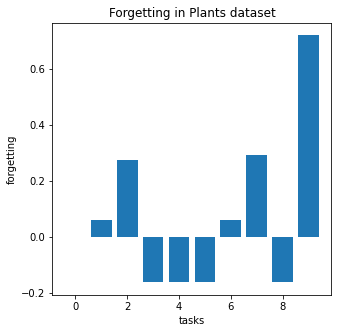

In [3]:
hparams_dict = {
    'inputs': 120,
    'outputs': 19,
    'time_constant': 300,
    'alpha_a': 0.42,
    'alpha_m': 0.07,
    'w_max': 100.0,
    'w_min': -100.0,
    'lr': 5e-4,
    'sim_time': 600,
    'n_epochs': 2500,
    'print_every': 500,
    'name': 'Plants',
    'tasks': {'samples': [435, 530, 438] + [465]*7, 'labels': [2]*9 + [1]},
    'seed': 2,
    'add_extra_neuron': True,
    'ckpt_dir': './checkpoints/eukaryote/mvmd',
    'load_from_file': None,
    'device': device
}
net = OverallSNN(hparams_dict)
net.fit_and_evaluate(train_spikes, train_labels, test_spikes, test_labels)